<a href="https://colab.research.google.com/github/emnasouki/Star_Type/blob/main/Star_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Main goal of our Datset**

 This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

Kaggle link to the Dataset: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

# **Uploading DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 

import pandas as pd 
df=pd.read_csv('/content/drive/MyDrive/PM-DM/star_classification.csv',  sep=",")
display(df.head())

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

# **Basic information about data**

**About Dataset:**

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.


*   obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
*   alpha = Right Ascension angle (at J2000 epoch)
*   delta = Declination angle (at J2000 epoch)
*   u = Ultraviolet filter in the photometric system
*   g = Green filter in the photometric system
*   r = Red filter in the photometric system
*   i = Near Infrared filter in the photometric system
*   z = Infrared filter in the photometric system
*   run_ID = Run Number used to identify the specific scan
*   retreun_ID = Rerun Number to specify how the image was processed
*   cam_col = Camera column to identify the scanline within the run
*   field_ID = Field number to identify each field
*   spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
*   class = object class (galaxy, star or quasar object)
*   redshift = redshift value based on the increase in wavelength
*   plate = plate ID, identifies each plate in SDSS
*   MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
*   fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation



In [ ]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
#Describe the data
df.describe()

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

# **Duplicated values**

In [ ]:
df.duplicated().sum()

0

# **Unique values in the data**

In [ ]:
print(df.columns)

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')


In this part we will check our data to see whether we can categorise some of our features. 

*Unique* values of :

In [ ]:
print(len(df['obj_ID'].unique()))
print(df['obj_ID'].unique())

78053
[1.23766096e+18 1.23766488e+18 1.23766096e+18 ... 1.23766830e+18
 1.23766115e+18 1.23766115e+18]


In [ ]:
print(len(df['alpha'].unique()))
print(df['alpha'].unique())

99999
[135.6891066  144.82610055 142.18878956 ... 224.58740744 212.26862112
 196.89605297]


In [ ]:
print(len(df['delta'].unique()))
print(df['delta'].unique())

99999
[32.49463184 31.27418489 35.58244418 ... 15.70070739 46.66036528
 49.46464277]


In [ ]:
print(len(df['u'].unique()))
print(df['u'].unique())

93748
[23.87882 24.77759 25.26307 ... 21.16916 25.35039 22.62171]


In [ ]:
print(len(df['g'].unique()))
print(df['g'].unique())

92651
[22.2753  22.83188 22.66389 ... 19.26997 21.63757 21.79745]


In [ ]:
print(len(df['r'].unique()))
print(df['r'].unique())

91901
[20.39501 22.58444 20.60976 ... 18.20428 19.91386 20.60115]


In [ ]:
print(len(df['i'].unique()))
print(df['i'].unique())

92019
[19.16573 21.16812 19.34857 ... 17.69034 19.07254 20.00959]


In [ ]:
print(len(df['z'].unique()))
print(df['z'].unique())

92007
[18.79371 21.61427 18.94827 ... 20.73569 17.35221 18.62482]


In [ ]:
print(len(df['class'].unique()))
print(df['class'].unique())

3
['GALAXY' 'QSO' 'STAR']


In [ ]:
print(len(df['run_ID'].unique()))
print(df['run_ID'].unique())

430
[3606 4518 4192 8102 7773 3716 5934 3927 8157 7712 1412 2821 3015 5416
 6574 7675 2126 2777 3530 6573 3893 5972 4576 8096 3841 6366 7718 5322
 5112 1904 3926 4470 8100 3557 4836 2825 2243 4828 5137 4504 1739 4822
 3910 8067 4263 1140 4880 8038 2190 5313 1907 5327 3830 7717 4671 8095
 8111 7765 3838 7778 1453 6003 7923 4649 8108 2379 3187 5360 2987 3225
 4264 4849 3918 8116 6597 7917 6162 2206 6354 3705 2964 1231 4678 4152
 5224 3972 3894 5061 4552 2327 4381 3103 2662  109 5183 5314 2247 3699
 7760 5973 5194 8103 5317 3919 3836 5065 2074 4187  752 3058 6572 4512
 2207 8155 3842 2831  745 4072 4858 1458 7713 3805 5655 3964 6361 1738
 6585 2125 1402 1462 2830 3180 5323 5598 4670 5396 3226 4134 7727 5960
 6605 3185 3697 2248 1239 7865 7881 4335 1740 5403  211 2348 5080 4633
 3600 4011 8054 4508 5421 2335 4207 1241 5390 8112  756 3903 5935 3367
 2391 6182 7912 8162 7880 3723 6581 5237 3698 4679 2863  307 4832 2076
 6004 8109 4646 2334 5640 4600 3560 2127 4188 5378 3965 6519 8150 4569
 7

In [ ]:
print(len(df['rerun_ID'].unique()))
print(df['rerun_ID'].unique())

1
[301]


In [ ]:
print(len(df['cam_col'].unique()))
print(df['cam_col'].unique())


6
[2 5 3 4 6 1]


In [ ]:
print(len(df['field_ID'].unique()))
print(df['field_ID'].unique())

856
[ 79 119 120 214 137 110 462 346 108 122  27 112  38 123 255 118 284 339
 425 124 136  28  30  33  94 126 195 177 203 180  85  12 441 198 168 114
 225 138 245 158 211 419  51 155  69 261 125 231  37  34 385 279 343  63
 109  83 141  17 179  89  55 193  14  62  95  57  67 382 390 212 301  47
  92 265 134 175 190 111 276 518 187 223 149 310 181 316 437  31 222 164
 107  59 121 383 435  78 365 459 182 176 217 186 192 247 493 157 308 317
 314 220 178 145 302 318 326 244 250 205 230 256 159  84 396 216 392 232
 273 191  76  96 189 128 132  99 506 206  74 147  15  18 283 286 335  82
 312 129 135  36  45  46  25 259  88 156 202 115 104  71 381 194  98 344
 210  50 166  49 106 219 142  90 254 354 341 204  61 257 496 239  75 133
 152 305 333 113 226  64 160  42 389 400 411 483 127  66  35 117 307  39
 242 253 237 270 116 300 146 315 154 221 200 263 415 380 386  40 367 266
 229  87 102 151  54  48 228  29 199 167 196 321 349 770 150 100 377 331
 485 197 144 298 260 201 379 440 148  16  68 50

In [ ]:
print(len(df['spec_obj_ID'].unique()))
print(df['spec_obj_ID'].unique())

100000
[6.54377737e+18 1.17601420e+19 5.15220026e+18 ... 3.11200776e+18
 7.60107957e+18 8.34315235e+18]


In [ ]:
print(len(df['redshift'].unique()))
print(df['redshift'].unique())

99295
[0.6347936 0.779136  0.6441945 ... 0.1433656 0.4550396 0.5429442]


In [ ]:
print(len(df['plate'].unique()))
print(df['plate'].unique())

6284
[ 5812 10445  4576 ...   593  2078  2661]


In [ ]:
print(len(df['MJD'].unique()))
print(df['MJD'].unique())

2180
[56354 58158 55592 ... 52673 53086 53855]


In [ ]:
print(len(df['fiber_ID'].unique()))
print(df['fiber_ID'].unique())

1000
[ 171  427  299  775  842  741  113   15  719  232  525  855  574  200
  796   23  178  295  258  613  572  756  115  596  368  190  170  203
  184  231  199  141  313  306  375  987  833  229  799  703  919  357
  862  452  183  344  748  320  340  144  220  206  797  668  533  711
  328  767  464  630  223  504  255  167  510  266  687  425   28  667
  745  177  324  882  519  483  440  267   10  912  886  915  821  997
  754  410  442  142  496  785  280   35  173  422  940  889  653   63
  603  721  676  282  505  957  271  876  202   96  316   50  449  623
  564  215  600  169  149  193  562  388  979  180  185  207  594  758
  150  259  486  959  622  584   51  485  493  481  800  628  376   22
  230  943  445    4  645  166  755  931  557  679  578   70  329  123
   37  531  159   39  608  458  382   69  243  373  646  849  319  591
  366  895  333  782  363  317  617  314  599  364  962  395  303  544
  347  152  334  593  139  418  402  482  433  832  487  839  424   40
 

This analysis leads us to conclude that our dataset contains 2 **Categorical** features and 16 **Qantitative** features.

The value of 'rerun_ID' is constant through all the data set so it's better to delete it.
# **Categorical features:** Class & Cam_col

In [ ]:
df.drop('rerun_ID', inplace=True, axis=1)

# **ONE HOT-ENCODER**

# **DUMMY ENCODER**

In [ ]:
from pandas.io.formats.style_render import DataFrame

# one-hot-encoding pour transformer les variables 'gender','race/ethnicity','lunch','test_preparation_course'
data_ohe =pd.get_dummies(df[['class','cam_col']], columns=['class','cam_col'], drop_first=True)
display(data_ohe)

class_QSO  class_STAR  cam_col_2  cam_col_3  cam_col_4  cam_col_5  \
0              0           0          1          0          0          0   
1              0           0          0          0          0          1   
2              0           0          1          0          0          0   
3              0           0          0          1          0          0   
4              0           0          0          1          0          0   
...          ...         ...        ...        ...        ...        ...   
99995          0           0          1          0          0          0   
99996          0           0          0          0          0          0   
99997          0           0          0          0          1          0   
99998          0           0          0          0          1          0   
99999          0           0          0          0          1          0   

       cam_col_6  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
99995          0  
99996          0  
99997          0  
99998          0  
99999          0  

[100000 rows x 7 columns]

# **MATRIX COORELATION**

In [ ]:
#Correlation
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient()

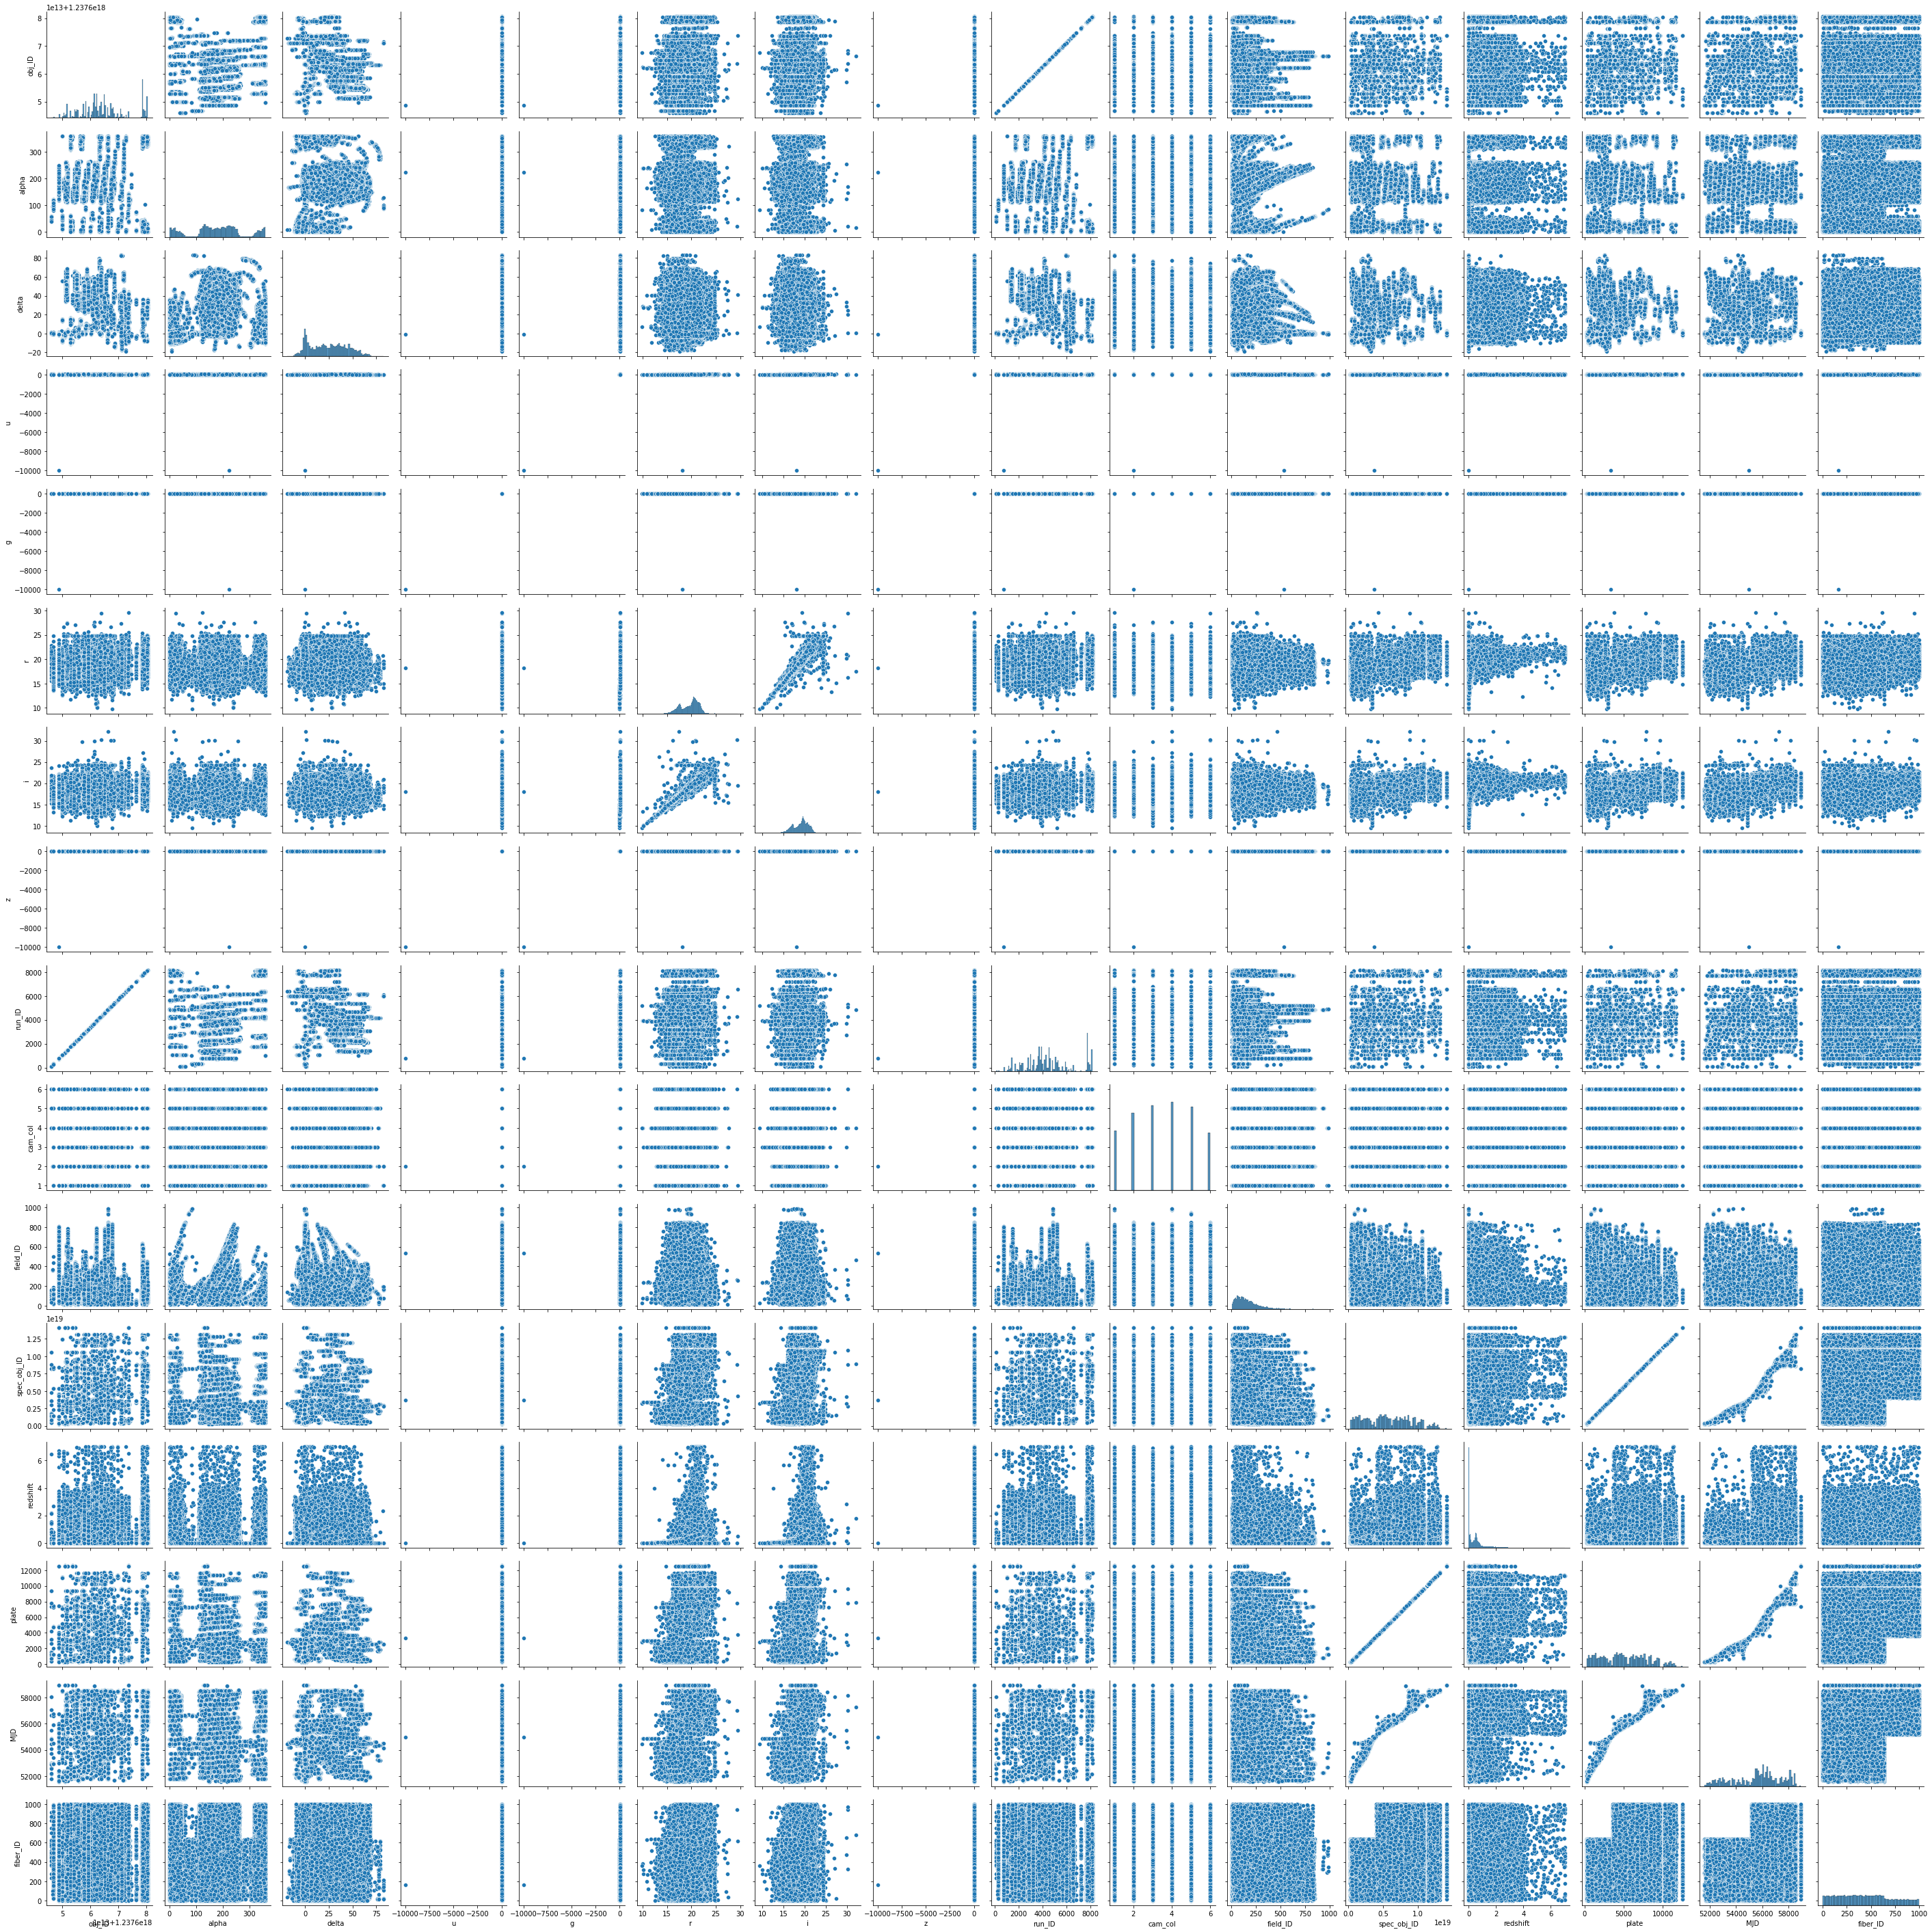

In [ ]:
import seaborn as sns
sns.pairplot(df)

# **REMOVING LINEAR FEATURES**

In [ ]:
df.drop(columns=['run_ID','MJD','plate','g','r','z'], inplace=True, axis=1)

In [ ]:
#Correlation
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient()

In [ ]:
#import seaborn as sns
#sns.pairplot(df)

In [ ]:
print(df)

             obj_ID       alpha      delta         u         i  cam_col  \
0      1.237661e+18  135.689107  32.494632  23.87882  19.16573        2   
1      1.237665e+18  144.826101  31.274185  24.77759  21.16812        5   
2      1.237661e+18  142.188790  35.582444  25.26307  19.34857        2   
3      1.237663e+18  338.741038  -0.402828  22.13682  20.50454        3   
4      1.237680e+18  345.282593  21.183866  19.43718  15.97711        3   
...             ...         ...        ...       ...       ...      ...   
99995  1.237679e+18   39.620709  -2.594074  22.16759  21.30548        2   
99996  1.237679e+18   29.493819  19.798874  22.69118  19.75759        1   
99997  1.237668e+18  224.587407  15.700707  21.16916  17.69034        4   
99998  1.237661e+18  212.268621  46.660365  25.35039  19.07254        4   
99999  1.237661e+18  196.896053  49.464643  22.62171  20.00959        4   

       field_ID   spec_obj_ID   class  redshift  fiber_ID  
0            79  6.543777e+18  GALAXY  

# **DATA NORMALIZATION**

In [ ]:
from sklearn import preprocessing

In [ ]:
toNormalize=df[['alpha','delta','u','i','field_ID','spec_obj_ID','redshift','fiber_ID']]
normalized_data = preprocessing.normalize(toNormalize)

datan =pd.DataFrame(normalized_data, columns=['alpha','delta','u','i','field_ID','spec_obj_ID','redshift','fiber_ID'])

display(datan)

alpha         delta             u             i      field_ID  \
0      2.073559e-17  4.965730e-18  3.649088e-18  2.928848e-18  1.207254e-17   
1      1.231500e-17  2.659337e-18  2.106912e-18  1.799988e-18  1.011893e-17   
2      2.759768e-17  6.906262e-18  4.903356e-18  3.755399e-18  2.329102e-17   
3      3.288406e-17 -3.910541e-20  2.148982e-18  1.990525e-18  2.077454e-17   
4      5.010002e-17  3.073749e-18  2.820308e-18  2.318256e-18  1.987851e-17   
...             ...           ...           ...           ...           ...   
99995  3.753985e-18 -2.457834e-19  2.100336e-18  2.018653e-18  5.504862e-17   
99996  3.434966e-18  2.305854e-18  2.642704e-18  2.301046e-18  3.365807e-17   
99997  7.216801e-17  5.045202e-18  6.802412e-18  5.684542e-18  9.897148e-17   
99998  2.792611e-17  6.138650e-18  3.335104e-18  2.509188e-18  1.723439e-17   
99999  2.359972e-17  5.928771e-18  2.711410e-18  2.398325e-18  7.191526e-18   

       spec_obj_ID      redshift      fiber_ID  
0              1.0  9.700721e-20  2.613170e-17  
1              1.0  6.625226e-20  3.630909e-17  
2              1.0  1.250329e-19  5.803346e-17  
3              1.0  9.050958e-20  7.523489e-17  
4              1.0  1.684924e-20  1.221730e-16  
...            ...           ...           ...  
99995          1.0  0.000000e+00  4.149965e-17  
99996          1.0  4.715566e-20  1.008577e-16  
99997          1.0  4.606852e-20  2.377886e-17  
99998          1.0  5.986513e-20  6.183332e-17  
99999          1.0  6.507663e-20  1.019998e-16  

[100000 rows x 8 columns]

In [ ]:
def minMax(x):
  return pd.Series(index=['min', 'max'], data=[x.min(), x.max()])

datan.apply(minMax)

alpha         delta             u             i      field_ID  \
min  7.137113e-22 -1.867652e-17 -2.679780e-15  1.020782e-18  8.819860e-19   
max  8.255768e-16  1.634514e-16  8.114685e-17  6.826507e-17  2.203742e-15   

     spec_obj_ID      redshift      fiber_ID  
min          1.0 -1.337774e-20  8.495250e-20  
max          1.0  1.552413e-17  2.117754e-15

In [ ]:
frames = [data_ohe, datan]
  
# result = pd.concat(frames)
result = pd.concat([data_ohe,datan], axis=1)
# result.head
display(result)

class_QSO  class_STAR  cam_col_2  cam_col_3  cam_col_4  cam_col_5  \
0              0           0          1          0          0          0   
1              0           0          0          0          0          1   
2              0           0          1          0          0          0   
3              0           0          0          1          0          0   
4              0           0          0          1          0          0   
...          ...         ...        ...        ...        ...        ...   
99995          0           0          1          0          0          0   
99996          0           0          0          0          0          0   
99997          0           0          0          0          1          0   
99998          0           0          0          0          1          0   
99999          0           0          0          0          1          0   

       cam_col_6         alpha         delta             u             i  \
0              0  2.073559e-17  4.965730e-18  3.649088e-18  2.928848e-18   
1              0  1.231500e-17  2.659337e-18  2.106912e-18  1.799988e-18   
2              0  2.759768e-17  6.906262e-18  4.903356e-18  3.755399e-18   
3              0  3.288406e-17 -3.910541e-20  2.148982e-18  1.990525e-18   
4              0  5.010002e-17  3.073749e-18  2.820308e-18  2.318256e-18   
...          ...           ...           ...           ...           ...   
99995          0  3.753985e-18 -2.457834e-19  2.100336e-18  2.018653e-18   
99996          0  3.434966e-18  2.305854e-18  2.642704e-18  2.301046e-18   
99997          0  7.216801e-17  5.045202e-18  6.802412e-18  5.684542e-18   
99998          0  2.792611e-17  6.138650e-18  3.335104e-18  2.509188e-18   
99999          0  2.359972e-17  5.928771e-18  2.711410e-18  2.398325e-18   

           field_ID  spec_obj_ID      redshift      fiber_ID  
0      1.207254e-17          1.0  9.700721e-20  2.613170e-17  
1      1.011893e-17          1.0  6.625226e-20  3.630909e-17  
2      2.329102e-17          1.0  1.250329e-19  5.803346e-17  
3      2.077454e-17          1.0  9.050958e-20  7.523489e-17  
4      1.987851e-17          1.0  1.684924e-20  1.221730e-16  
...             ...          ...           ...           ...  
99995  5.504862e-17          1.0  0.000000e+00  4.149965e-17  
99996  3.365807e-17          1.0  4.715566e-20  1.008577e-16  
99997  9.897148e-17          1.0  4.606852e-20  2.377886e-17  
99998  1.723439e-17          1.0  5.986513e-20  6.183332e-17  
99999  7.191526e-18          1.0  6.507663e-20  1.019998e-16  

[100000 rows x 15 columns]